# NGC 205

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

%matplotlib inline

## B filter

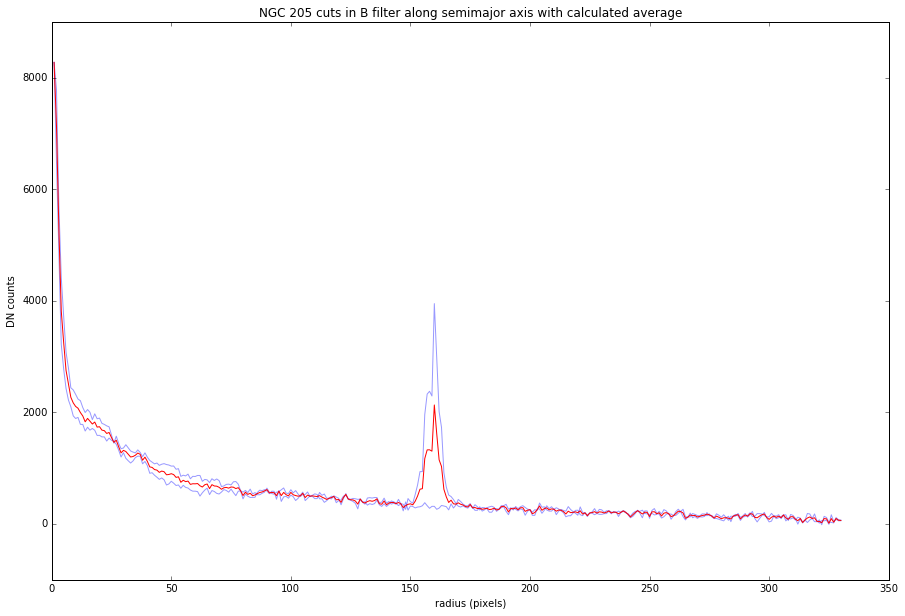

In [17]:
#mean sky value, standard deviation, etc from AIJ
mean_sky = 6404.186
sky_std = 67.506
area = 12070
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading NGC205 B data (just semimajor axis cuts) and subtracting mean sky value to get just galaxy counts
data_b = np.loadtxt('ngc205B.txt')
pix = data_b[:,0]
cut_1 = data_b[:,1] - mean_sky
cut_2 = data_b[:,2] - mean_sky
mean = data_b[:,3] - mean_sky
std = data_b[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 cuts in B filter along semimajor axis with calculated average')

The spike in one of the cuts is interesting- most likely due to a star either in front of or behind NGC 205 along that part of the cut. Otherwise, it seems to be exponentially decaying at a slower rate than the spiral galaxies' profiles have, which is what we'd expect! 

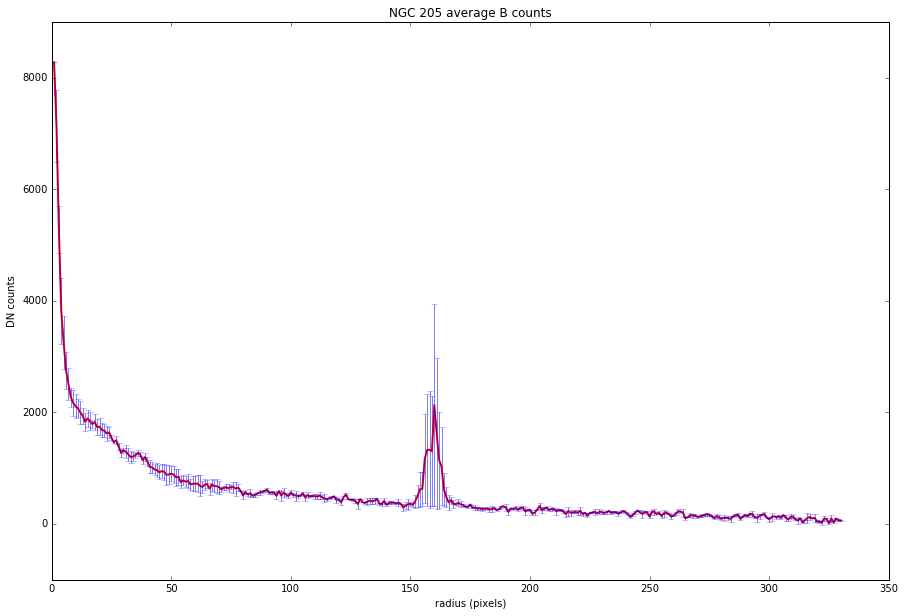

In [18]:
#calculating standard deviation of the mean
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 average B counts')

The standard deviation of the mean here isn't much smaller than the standard deviation of the data generally here because we only used two cuts.

linear best-fit parameters: [ 18.10131781   5.52925021]
uncertainties in best-fit parameters: [ 0.11132726  0.12710461]


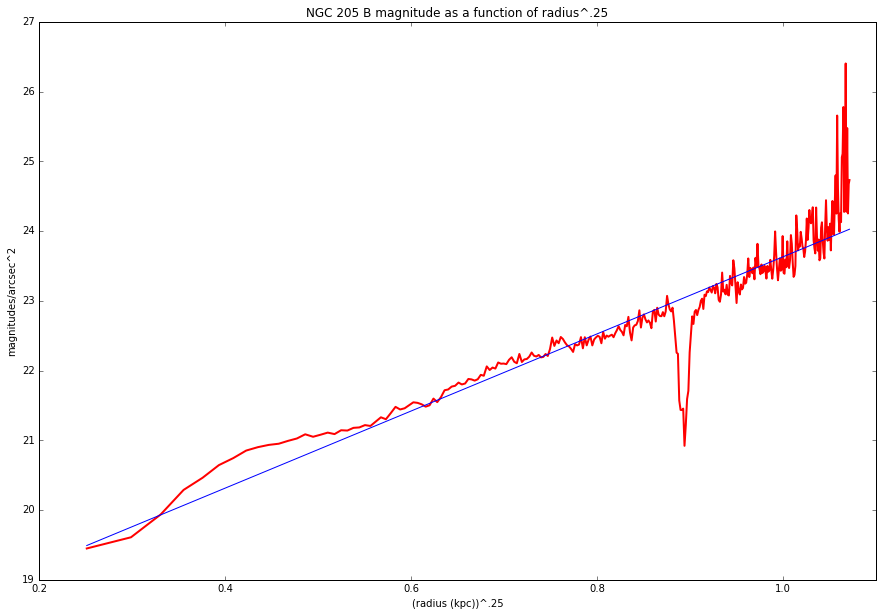

In [19]:
#ref star 2MASS J00400279+4144452 located at FITS(879,326) in combined NGC205 B image
ref_bmag = 14.6
#using source radius of 12pix, inner sky annulus radius 20pix, outer sky annulus radius 30pix
ref_DN = 7.2e5
zeropoint = ref_bmag + 2.5 * np.log10(ref_DN)

#converting DN counts to magnitudes using zeropoint calculated above
mean_mags = zeropoint - 2.5 * np.log10(mean)

#using NGC205's distance away from us to calculate size of radii
dist = 824 #kpc
angles = (pix / 3600) * (np.pi / 180) #converting from arcsec to degrees to radians
r_kpc = dist * np.tan(angles)

#defining linear model to calculate surface brightness profile best fit
#(magnitudes are a log of the counts - the function for surface brightness becomes linear instead of exponential)
def linear_model(constant, A, R):
    return A + R*constant

#finding the best fit parameters for the linear region of the plot above
#using r^.25 this time because we're looking at an elliptical galaxy!
#we're also not excluding a "bulge" section of the data because there isn't one
popt, pcov = scipy.optimize.curve_fit(linear_model, (r_kpc)**.25, mean_mags)
print'linear best-fit parameters:', popt
popt_uncertainties = np.sqrt(np.diag(pcov))
print'uncertainties in best-fit parameters:', popt_uncertainties

#calculating best fit line using measured radii and parameters above
best_fit_lin = linear_model((r_kpc)**.25, popt[0], popt[1])

fig = plt.figure(figsize=(15,10))
plt.plot((r_kpc)**.25, mean_mags, "r-", linewidth=2.0)
plt.plot((r_kpc)**.25, best_fit_lin)
plt.xlabel('(radius (kpc))^.25')
plt.ylabel('magnitudes/arcsec^2')
plt.title('NGC 205 B magnitude as a function of radius^.25')

As expected, it looks like the changes in brightness of NGC205 are linearly related to changes in radius^.25 - the brightness is decreasing more slowly than it did for any of the spirals we measured!

## V filter

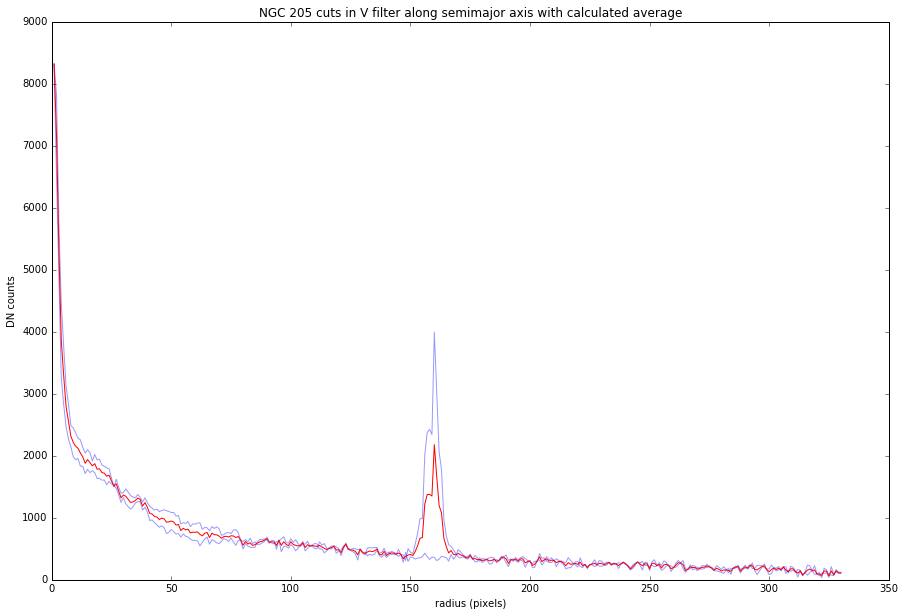

In [20]:
#mean sky value, standard deviation, etc from AIJ
mean_sky = 6357.220
sky_std = 55.346
area = 12710
sky_std_mean = sky_std / np.sqrt(area)

data_v = np.loadtxt('ngc205B.txt')
pix = data_v[:,0]
cut_1 = data_v[:,1] - mean_sky
cut_2 = data_v[:,2] - mean_sky
mean = data_v[:,3] - mean_sky
std = data_v[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 cuts in V filter along semimajor axis with calculated average')

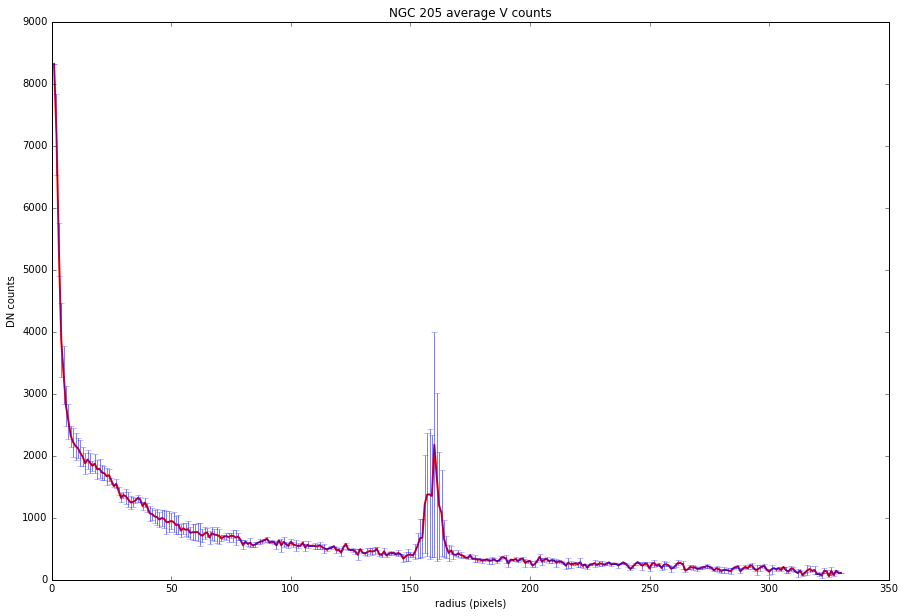

In [21]:
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 average V counts')

## R filter

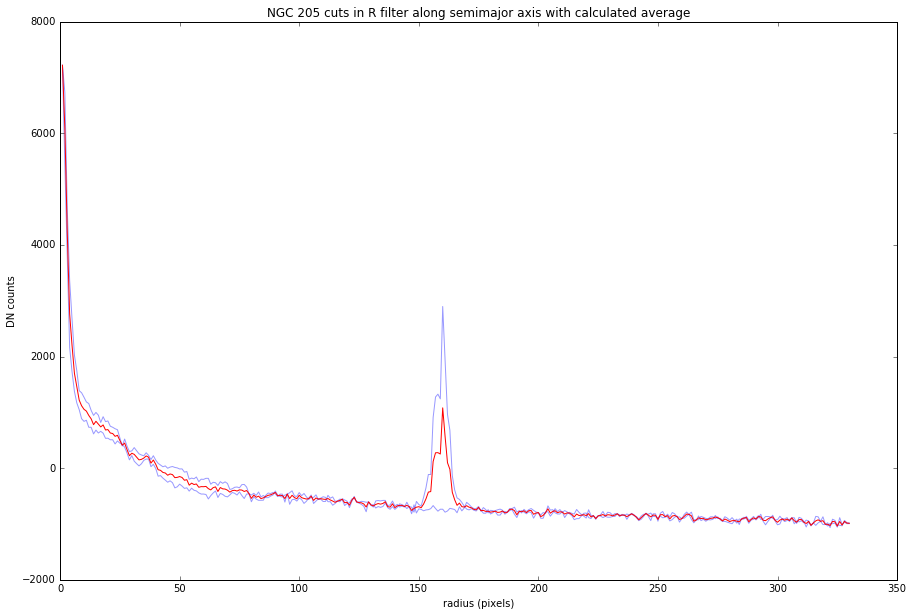

In [22]:
#mean sky value, standard deviation, etc from AIJ
mean_sky = 7455.730
sky_std = 62.187
area = 10880
sky_std_mean = sky_std / np.sqrt(area)

data_r = np.loadtxt('ngc205B.txt')
pix = data_r[:,0]
cut_1 = data_r[:,1] - mean_sky
cut_2 = data_r[:,2] - mean_sky
mean = data_r[:,3] - mean_sky
std = data_r[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 cuts in R filter along semimajor axis with calculated average')

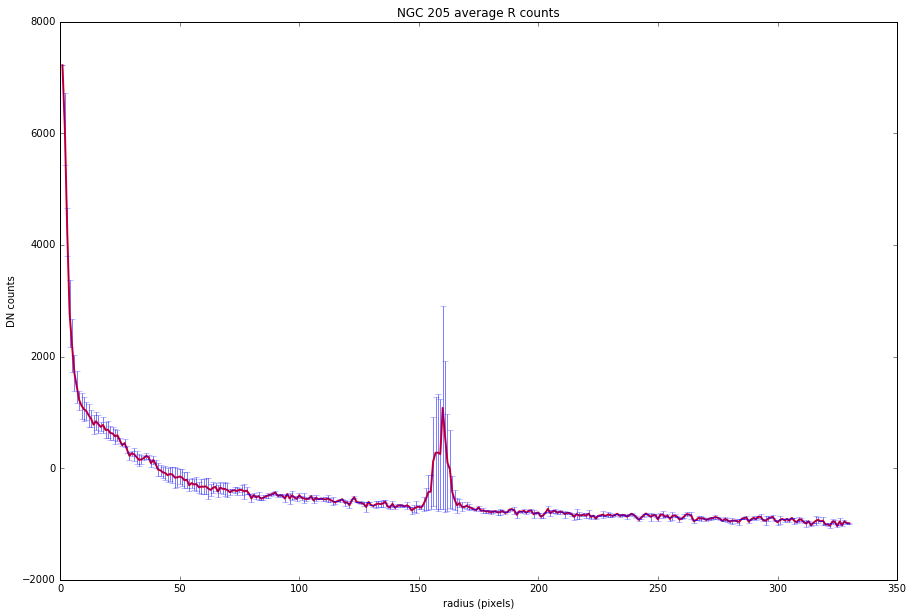

In [23]:
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 average R counts')